# k-fold cross-validation

- K-fold cross-validation is a popular technique used to evaluate the performance of machine learning models.
- It is advantageous when you have limited data and want to maximize it while **estimating how well your model will generalize to new, unseen data.**
- **Basic idea behind k-fold cross-validation** is to split the dataset into k subsets of approximately equal size, or “folds.” The model is trained and evaluated k times, using a different fold as the validation set and the remaining k-1 folds as the training set. The final evaluation metric is usually the average of the evaluation results from all k iterations.



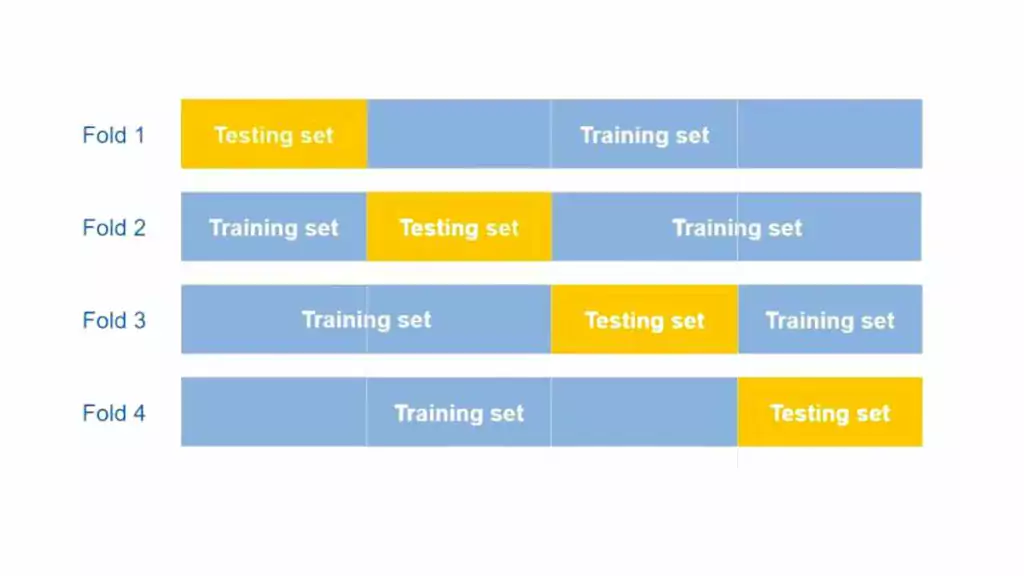

# k-fold cross-validation process

1.**Data Preparation**: Start with a dataset you want to use for training and evaluation.

2.**Shuffling (Optional)**: **Shuffling** the data randomly before splitting it into folds is an excellent practice. This helps reduce potential biases due to any inherent order in the data.

3.**Partitioning**: Divide the data into k subsets of approximately equal size. These subsets are called **“folds**.”

4.**Model Training and Evaluation**: For each fold:
a. Use k-1 folds as the training data to train the machine learning model.
b. Use the remaining 1 fold as the validation data to evaluate the model’s performance.
c. Record the evaluation metric (e.g., accuracy, precision, recall, F1-score).

5.**Performance Metric Calculation**: After performing k iterations, calculate the average of the evaluation metrics obtained during each iteration. This estimates how well the model is expected to act on unseen data.

6.**Model Selection**: Depending on your objective, you may choose the best-performing model from the k iterations, or you can use this process to fine-tune hyperparameters, architecture, or other aspects of your model.

# Advantages of k-fold cross-validation

- It provides a more robust estimate of the model’s performance since it uses multiple data splits.
- Makes efficient use of data, especially when the dataset is small.

Common choices for k in k-fold cross-validation are **5 and 10**, but you can choose other values based on your specific dataset and requirements. However, keep in mind that as k increases, the computational cost also increases. In extreme cases, when k is equal to the number of samples in the dataset (k=N, known as **leave-one-out cross-validation**), each sample is used as a separate validation set, but this can be **computationally expensive for large datasets**.

Remember that the **primary goal of cross-validation is to estimate how well your model generalizes to new, unseen data, and it can help you identify potential issues like overfitting or underfitting.**


1.Reduced Overfitting
- Cross-validation mitigates this by using multiple train-test splits and averaging the results, reducing the impact of any specific data split. By repeatedly training on different subsets of the data, cross-validation provides a more balanced and generalizable assessment of the model’s performance.

2.Better Utilization of Data
- Cross-validation addresses this by using the entire dataset for both training and testing in different folds. This leads to better utilization of the data and more reliable performance estimates, especially when data is limited.

3.Hyperparameter Tuning
- Cross-validation is commonly used for tuning, where different hyperparameter values are evaluated and compared.

4.Model Selection
- When comparing multiple models or algorithms, cross-validation provides a fair and consistent evaluation, ensuring all models are assessed on the same data splits. This helps select the best-performing model based on its average performance across multiple folds.

5.Robustness to Data Variability
- Datasets may have inherent variability due to the randomness of data collection or external factors. By using different data splits in cross-validation, the model’s performance estimate becomes more robust and less sensitive to variations in the dataset.

6.Insight into Model Variance
- By analyzing the variance in performance across different folds, you can gain insights into the model’s sensitivity to different training data. If the variance is high, it may indicate that the model is not stable and might benefit from more data or regularization techniques.


# variations of cross-validation techniques

- **K-Fold Cross-Validation**: The dataset is divided into k subsets (folds), and the model is trained and evaluated k times. Each time, one fold is used as the validation set, and the remaining k-1 folds are used as the training set.

- **Stratified K-Fold Cross-Validation:** This variation is commonly used for **classification tasks where the class distribution is not uniform**. A stratified k-fold ensures that the class distribution is preserved in each fold, reducing potential biases in the evaluation.

- **Leave-One-Out Cross-Validation (LOOCV)**: In this approach, k is set to the number of samples in the dataset (N). Each sample is used as a separate validation set, and the model is trained on N-1 samples. LOOCV is computationally expensive but provides an unbiased model performance estimate.

- **Leave-P-Out Cross-Validation**: Similar to LOOCV, but instead of leaving one sample out, p samples are left out for validation, and the model is trained on the remaining data.

- **Time Series Cross-Validation**: This technique is used when dealing with time series data, where the order of the data points matters. Time series cross-validation ensures that the model is trained on past data and evaluated on future data, simulating real-world scenarios. We will discuss this technique in more detail further on.

# To choose the right k for cross-validation

The selection of the appropriate k value depends on various factors, including the size of your dataset, the distribution of the data, and the computational resources available. Here are some guidelines to help you decide the correct k value:



**1.Smaller Datasets:**
- For small datasets, using a **larger k value (e.g., k=5 or k=10) is preferred**. This allows more data for training and validation in each fold, reducing the variance in performance estimates.

**2.Larger Datasets:**
- For larger datasets, you can use a **smaller k value (e.g., k=3) to speed up the cross-validation process** while obtaining a reasonable estimate of model performance.

**3.Imbalanced Datasets:**
If your dataset is imbalanced, meaning the class distribution is not uniform, consider using **stratified k-fold cross-validation (or variants like StratifiedKFold)** to ensure that each fold preserves the class distribution. This helps to prevent biased evaluation and provides more reliable performance estimates, especially in classification tasks.

**4.Time Series Data:** For time series data, where the order of observations matters, consider using **time series-specific cross-validation techniques like TimeSeriesSplit**, which ensure that the model is evaluated on future data points after being trained on past data points.

**5.Computational Resources:** Larger k values lead to more model training iterations, making cross-validation more computationally expensive. If you have limited computational resources, it may be more **practical to use smaller k values.**

**6.Trade-off Between Variance and Bias:** **Smaller k values lead to a higher variance in performance estimates**, while **larger k values may introduce a higher bias**. Sticking a balance is essential based on the specific problem and data.

**7.Nested Cross-Validation:** If you are using **cross-validation for hyperparameter tuning (e.g., with GridSearchCV), you can perform an outer cross-validation for model evaluation (e.g., k=5) and an inner cross-validation for hyperparameter tuning (e.g., k=3). This technique, known as nested cross-validation**, can provide more robust estimates when dealing with limited data.


In practice, it’s a good idea to experiment with different k values and compare the results. You can perform a grid search over k values and assess how they impact the model’s performance. Ultimately, the choice of k will depend on the specific characteristics of your dataset and the objectives of your analysis.

# cross-validation for time series

- In time series data, the order of observations matters as each data point is recorded at a specific time. Therefore, the typical random splitting used in traditional cross-validation may not be suitable for time series datasets, as it can introduce data leakage and unrealistic evaluation scenarios.

- The main idea behind time series cross-validation is to mimic the real-world scenario where the model is trained on historical data and tested on future data without using future information during training. This approach provides a more realistic evaluation of the model’s performance and ability to predict unseen future data points.



There are two standard methods of time series cross-validation:

**1.Train-Test Split with a Time-based Cut-off:**
In this approach, split the time series data into two parts:
- ** training set**, which contains data up to a specific time point,
- **test set**, which includes data from a later time point.

The model is trained on the training set and evaluated on the test set. The time-based cut-off **ensures that data from the test set comes after the data used in the training set.**

**2.Rolling Window Cross-Validation:** This method uses a **fixed-sized rolling window to create multiple train-test splits**. The window slides through the time series, and at each step, use a portion of the data as the training set and the subsequent data as the test set. This process continues until the entire time series is covered. It’s like **performing multiple train-test splits with a sliding window.**

Both methods ensure that the model is not exposed to future information during training, and the evaluation reflects the model’s ability to make predictions on future data points.

In time series cross-validation, the order of the **data should be preserved, and you should be cautious not to introduce any data leakage**. Data leakage can occur when features or information from the future are used during training, leading to overly optimistic performance estimates.

Time series cross-validation is valuable for selecting appropriate hyperparameters, assessing model performance, and gaining insights into how well a model generalizes to future observations. However, it is computationally more demanding than traditional cross-validation due to the sequential nature of the data, as the model needs to be retrained for each validation fold.

# K fold cross-validation with deep learning

Cross-validation can also be used with deep learning models to evaluate their performance and tune hyperparameters effectively. The process is similar to traditional machine learning models, but there are a few essential considerations specific to deep learning:



**1.Data Preprocessing:** Deep learning models often require more extensive data preprocessing, such as **normalization, data augmentation, or feature scaling**. Ensure to consistently apply the same preprocessing steps across all folds during cross-validation.

**2.Time and Resource Constraints:** Deep learning models can be computationally expensive and time-consuming to train, especially on large datasets. **When using k-fold cross-validation, consider the available computational resources and choose an appropriate value of k that balances computation time and model evaluation accuracy.**

**3.Data Leakage:** When using **data transformations or augmentations, be cautious about data leakage**. Ensure that any data augmentation or modifications are applied only to the training set during each fold and not to the validation or test sets to avoid introducing data leakage.

**4.Architecture and Hyperparameter Tuning:**Cross-validation can be used for **tuning hyperparameters of deep learning models, such as learning rate, number of layers, batch size, and regularization parameters**. Consider using nested cross-validation to perform hyperparameter tuning alongside model evaluation.

# Source

- https://spotintelligence.com/2023/07/29/k-fold-cross-validation/